# Capstone 1 - Part 1

### Dataset: Download CSV file from [here](https://drive.google.com/file/d/1LfquyGkEO45x35q8yvYzke8lswCfBu89/view?usp=sharing)
 
### Context & Problem statement:

This is a fictional data set that contains atmost 30 features of categorical and discreet data. These data are kind of both numerical and text values which help in analysing the employee data from hiring to firing and on boarding to attrition.  Dive into current available HR metrics to reduce the attrition rate and improve employee performance. Employee attrition has long been a significant worry for organizations due to the substantial investments of time, money, and effort in training new employees. When an employee departs, it results in overall losses for the company, including the cost of replacing and retraining, as well as disruptions in workflow. Moreover, attrition can erode trust among remaining employees, creating additional management challenges.

The HR Attrition dataset, albeit fictional, serves the purpose of identifying key factors that could play a pivotal role in determining which employees are more likely to leave the company and who is likely to stay. In this capstone, we delve into a thorough analysis of these influential factors and employ predictive modeling techniques to gain a deeper understanding, ultimately enabling us to make accurate predictions regarding employee attrition.

### Business use case:

- Brief overview of attrition within the organization
- Explore the main factors that lead to employee attrition
- Propose relevant contributors to Performance Ratings and calculate their correlations

### Goals/ Metrics:

- Identify top reasons for attrition and recommend further action steps to improve
- Point out key factors that drive employee performance

## TODO: Please make use of Python, Pandas, Numpy, Matplotlib and relevant libraries to do the following:

### Data Retrieval (1 pt)
- Extracting the dataset from the source (e.g., CSV file)
- Exploring the dataset structure, features, and target variable (attrition)
- Understanding the context and significance of each feature in relation to employee attrition

### Data preprocessing (2 pts)
- Cleaning the dataset to handle missing values, duplicates, and outliers
- Encoding categorical variables and transforming data types as necessary

### Feature Engineering & EDA (3 pts)
- Feature engineering to create new variables (e.g., employee tenure, performance scores) and do Exploratory Data Analysis (EDA)
- Analyzing factors contributing to employee attrition (e.g., age, job role, salary, work environment)
- Visualizing attrition rates across different demographic and employment-related variables
- Identifying correlations and patterns in the data to understand attrition drivers
- Make use of 1-d and 2-d explorations to know your data better.

### Effective Communication (2 pts)
- Please make use of markdown cells to communicate your thought process, why did you think of performing a step? what was the observation from the visualization? etc. 
- Make sure the plots are correctly labelled. 
- The code should be commented so that it is readable for the reviewer.

### Grading and Important Instructions
- Each of the above steps are mandatory and should be completed in good faith
- Make sure before submitting that the code is in fully working condition
- It is fine to make use of ChatGPT, stackoverflow type resources, just provide the reference links from where you got it
- Debugging is an art, if you find yourself stuck with errors, take help of stackoverflow and ChatGPT to resolve the issue and if it's still unresolved, reach out to me for help.
- You need to score atleast 7/10 to pass the project, anything less than that will be marked required, needing resubmission.
- Feedback will be provided on 3 levels (Awesome, Suggestion, & Required). Required changes are mandatory to be made.
- For submission, please upload the project on github and share the link to the file with us through LMS.

#### Write your code below and do not delete the above instructions

Load the dataset and create 2 identical datasets,one will be used for OHE and one wont be encoded, for visualizing attrition rates.

In [17]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/Users/farokh/Downloads/HR-Analytics.csv')
df1 = pd.read_csv('/Users/farokh/Downloads/HR-Analytics.csv')

Display Summary information.

In [4]:
# Display the first few rows
print(df.head())

# Display summary information
print(df.info())

# Summary statistics
print(df.describe())

# Checking for missing values
print(df.isnull().sum())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [5]:
# Check unique values for categorical features
print(df['JobRole'].unique())

# Check the distribution of the target variable (Attrition)
print(df['Attrition'].value_counts())

['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
No     1233
Yes     237
Name: Attrition, dtype: int64


Cleaninng the data by dropping null rows, removing duplicates and outliers.

In [7]:
# Drop or impute missing values
# Dropping rows with missing values
df = df.dropna()  

In [9]:
# Remove duplicates
df = df.drop_duplicates()

In [11]:
# Detect outliers using IQR for Monthly Income
Q1 = df['MonthlyIncome'].quantile(0.05)
Q3 = df['MonthlyIncome'].quantile(0.95)
IQR = Q3 - Q1
outliers = df[(df['MonthlyIncome'] < (Q1 - 1.5 * IQR)) | (df['MonthlyIncome'] > (Q3 + 1.5 * IQR))]


Encode categorical data using OHE

In [12]:
# One-hot encoding for categorical features
df = pd.get_dummies(df, columns=['JobRole', 'Gender', 'Department'])

In [13]:
# Example: Converting a numerical column to categorical
df['Education'] = df['Education'].astype('category')

In [14]:
df = pd.get_dummies(df, columns=['Education'])

In [15]:
# Calculate tenure
df['Tenure'] = df['YearsAtCompany'] - df['YearsInCurrentRole']


Visualize the attrition by job role data, we can see that Manufacturing Director, Healthcare Representative, Manager and Research Director are the safest roles for attrition, whereas Sales Representatives have the highest attrition rates, followed by Laboratory Technician, Sales Executive and Research Scientists.

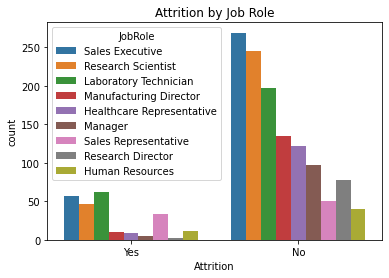

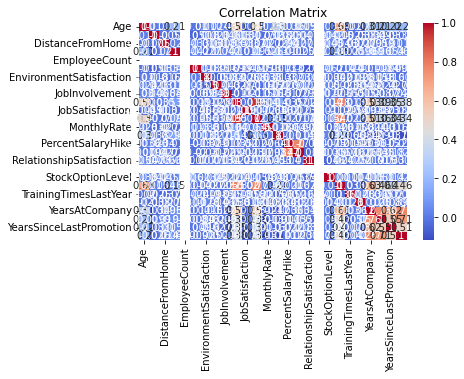

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize attrition rates across different demographics
sns.countplot(x='Attrition', hue='JobRole', data=df1)
plt.title('Attrition by Job Role')
plt.show()

# Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
